#Khachatrian Armen 
##Law of large numbers

In [ ]:
%matplotlib inline
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial


In [ ]:
download_images = False  # Set True to download image files
mpl.rcParams['figure.dpi'] = 100
#plt.style.use('dark_background')
plt.style.use('seaborn-dark')

## Warm-up

This class is **not** about proving theorems! But we can toy with this famous theorem, which underlies what we are doing in the first lesson. It's a fun warm-up for translating statistical thinking into simulations and data!

These questions refer to this theorem and the code cell below.

**Law of large numbers**. Let $X_1, X_2, ...$ be a sequence of independent identically distributed random variables with finite mean $E(X_1) = \mu$ and finite variance $V(X_1) = \sigma^2$. Let  $S_n = \sum_{i=1}^n X_i$. Then, $\text{ as } n \rightarrow \infty$

$$
\tfrac{1}{n} S_n \rightarrow \mu  \text{ almost surely }.
$$

Loose translation: $\tfrac{1}{n} S_n \rightarrow \mu$ means that if we calculate the average of a large data set it should be very close to the theoretical mean of the underlying distribution. "Almost surely" means we can rely on this to always happen, so long as our data set is a random sample from a well-behaved data-generating process.

0. In the code where are $\mu$ and $\sigma^2$ set?
1. In the code, what object corresponds to $X_1, X_2, ...$? Why is it not **exactly** the same?
2. What object corresponds to $S_n$?
3. What object corresponds to $\tfrac{1}{n} S_n$?
4. Intuitively, why is the line more stable at the end?

(The theorem is adapted from Grimmett and Stirzaker. *Probability and Random Processes*. 2001.)

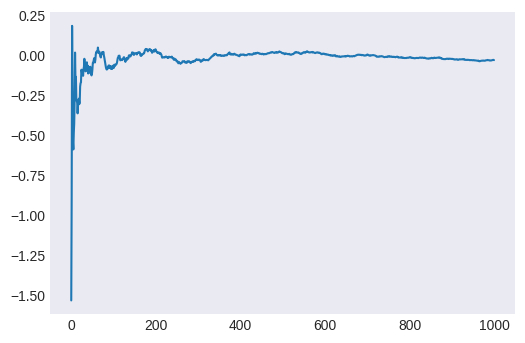

In [ ]:
# Code for the warm-up above
X_n = np.random.normal(loc=0, scale=1, size=(10 ** 3, 1))
partial_sums = X_n.cumsum(axis=0)
n_index = np.arange(start=1, stop=len(partial_sums) + 1).reshape((-1, 1))
partial_means = np.divide(partial_sums, n_index)
  
plt.plot(partial_means)

In [ ]:
# Let's package the simulation in a function.

def simulate_lln(distribution, sequence_length=10 ** 3):
  # Generate the sequence {X_i}
  X_n = distribution(size=(sequence_length, 1))
  # Calculate the partial sums S_n = sum of X_i from i=1 to i=n
  partial_sums = X_n.cumsum(axis=0)
  # Calculate the partial sums for all n
  n_index = np.arange(start=1, stop=len(partial_sums)+1).reshape((-1, 1))
  # Divide by {n} to get the partial averages
  partial_means = np.divide(partial_sums, n_index)

  means = pd.DataFrame(partial_means, index=n_index[:,0], columns=['mean_n'])
  return means

In [ ]:
# Let's make two functions for graphing.
def plot_one(means_one_sequence, title=""):
#  """Use to plot one sequence of partial means"""
  label = r"Partial mean, $\frac{1}{n}\sum_{i=0}^n{X_i}$"
  ax = means_one_sequence.plot(linewidth=2, alpha=0.8, label=label, legend=True, color='#fa8174', figsize=(6, 4))
  ax.set_xlabel("Sample size, $n$", fontsize=18)
  ax.set_ylabel(r"Mean", fontsize=18)
  ax.tick_params(labelsize=18)
  ax.set_title("Law of large numbers\n{}".format(title), fontsize=18)
  leg = ax.legend(fontsize=18)

  return ax

def plot_many(means_data, title=""):
 # """Use to plot many sequences of partial means"""
  ax = means_data.plot(linewidth=1, alpha=0.3, figsize=(6, 4), legend=False)
  ax.set_xlabel("Sample size, $n$", fontsize=18)
  ax.set_ylabel(r"Mean", fontsize=18)
  ax.tick_params(labelsize=18)
  ax.set_title("Law of large numbers\n{}".format(title), fontsize=18)

  return ax



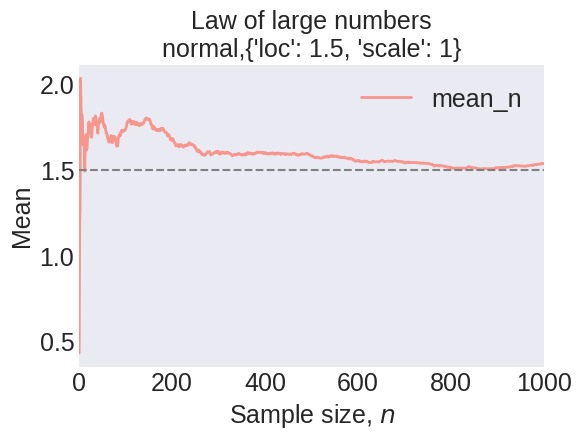

In [ ]:
expectation_X = 1.5
standard_dev_X = 1
# We can use `partial` to fill in some of the arguments and leave some for later.
distribution = partial(np.random.normal, loc=expectation_X, scale=standard_dev_X)
means = simulate_lln(distribution)

title = ",".join([distribution.func.__name__, str(distribution.keywords)])
ax = plot_one(means.loc[0:10000], title)
ax.axhline(y=expectation_X, linestyle='--', color='grey')


## Exercises

1. Modify the function to take an argument `n_sequences` and create that many separate replications of the sequence $\{X_n\}$ at once. For example, it should let us create 50 sequences each with 1,000 points in one shot (a table with 1000 rows and 50 columns). Call the new function `simulation_lln_many`. (Hint: You only need to make changes in two lines. Update the `size` parameter.)

2. Simulate 100 sequences each with a length of 10,000. Use the standard normal distribution, i.e., Normal(0, 1). (Hint: Start with a small number of sequences to get everything working and save computation time.)

3. Plot your data in the `plot_many` function. Does your graph support the theorem? (Hint: I suggest starting the graph at $n=30$. It will look better.)

4. Re-run the simulation with 5,000 sequences. At $n=10,000$ what proportion of the sequences has a $\tfrac{1}{n} S_n$ within 0.0197 of 0? Print it using something like `print("P(|S_n / n| < 0.0197) = {}".format(p_within))`.

5. Repeat 2 and 3 but use `np.random.binomial(n=1, p=0.3)`. (Hint: To be really slick you can use `functools.partial`.)
 

# ANSWERS

# WARM-UP
###0) 𝜇 is loc=0, 𝜎2 is scale=1
###1) np.random.normal, as all these variables are normally distributed
###2) partial_sums 
###3) partial_means
###4) as all probabilities dont influence a lot to the total number, in that case when we plus more and more probabilities, the fraction remains comparably stable. That is why, initially it is flactuated (as the quantity is small), but then it remains almost stable

# Excercises 

In [ ]:
# 1
n_sequences = 50
def simulate_lln_many(distribution, sequence_length=10 ** 3):
  # Generate the sequence {X_i}
  X_n = distribution(size=(sequence_length, n_sequences))
  # Calculate the partial sums S_n = sum of X_i from i=1 to i=n
  partial_sums = X_n.cumsum(axis=0)
  # Calculate the partial sums for all n
  n_index = np.arange(start=1, stop=len(partial_sums)+1).reshape((-1, 1))
  # Divide by {n} to get the partial averages
  partial_means = np.divide(partial_sums, n_index)

  means1 = pd.DataFrame(partial_means, index=n_index[:,0])
  return means1
means1 = simulate_lln_many(distribution)
means1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
1,0.096855,1.445904,2.371188,1.317931,-0.497994,2.104730,2.367495,0.794219,2.686502,0.842945,1.346316,3.096745,0.882393,3.341681,2.587011,0.865868,3.193899,1.975894,1.059905,0.250417,0.291566,1.134161,0.193593,1.945859,1.593553,1.286649,1.435224,0.726635,1.282809,-0.101001,2.846704,2.887528,1.150474,1.298524,1.430079,3.034927,1.904600,1.827774,0.799907,2.911031,2.004003,2.633224,2.397240,1.434015,0.684280,2.458527,2.027108,1.529239,1.027667,1.128393
2,0.994096,0.994006,2.048121,1.729303,0.152959,1.266597,2.601458,1.009822,1.858287,1.757628,2.400531,1.954048,0.959963,2.826107,2.197610,0.759519,1.997911,2.255778,0.689610,1.020409,0.387141,1.450065,0.619766,0.824300,1.302487,2.488104,1.912763,0.118588,2.354010,1.157826,1.991413,1.712551,1.544300,2.051913,1.700527,1.982720,1.171547,1.655692,1.490826,1.947825,2.170753,1.732908,1.979482,1.708986,1.242377,2.310054,2.347886,1.039256,1.587073,1.637999
3,1.124255,1.217028,1.974618,1.600191,0.266451,1.210963,2.212721,1.096080,1.374969,2.006538,2.532746,1.689374,1.156725,1.770012,2.231403,0.712477,1.850989,2.609597,1.025484,1.192520,0.815834,1.619165,0.831315,0.753274,1.039642,2.196049,1.520853,0.687038,2.055565,1.875577,1.993896,1.259583,1.423008,2.542356,1.421433,2.161772,1.139151,2.019698,1.359315,1.943593,1.870160,1.908038,1.883909,2.077074,1.639741,2.163750,2.288546,1.298816,1.200015,1.930122
4,1.279802,1.230251,2.032749,1.359826,0.668139,1.384668,1.962771,1.570885,1.657464,2.075560,2.425471,1.483823,1.228520,1.490916,1.771889,0.678361,1.673881,2.654836,1.149757,1.625223,1.192804,1.482428,1.300400,1.014215,1.029315,2.377990,1.544099,0.786637,1.867307,1.635196,1.901332,1.465158,1.308880,2.125304,1.256825,1.752907,1.233022,2.090883,1.326819,1.594129,1.741740,1.682507,1.840980,1.866968,2.000082,2.168313,2.098703,0.987024,1.493113,1.939096
5,1.255939,1.222063,2.078181,1.455320,0.736442,1.588237,1.929875,1.400625,2.036464,1.896788,2.080729,1.448733,1.548030,1.724110,1.734111,0.802268,1.412233,2.846299,1.218183,1.895328,1.230247,1.962677,1.786610,1.284770,1.266919,2.160704,1.238015,0.734437,1.691747,1.679711,2.009015,1.347202,1.498273,1.860819,1.297952,1.982328,1.525523,1.937872,1.531655,1.517134,1.846248,1.595188,1.674598,1.676343,1.719650,1.981071,2.006793,0.926459,1.964715,1.908980
6,1.140650,1.253394,1.984600,1.232571,1.156476,1.468288,1.594926,1.249051,1.940113,1.715511,2.034600,1.675407,1.700095,1.746846,1.941486,0.794698,1.241398,2.530040,1.330703,1.804587,1.032754,1.828444,1.467631,1.259464,1.227948,2.129482,1.385054,1.174078,1.740057,1.634108,1.665113,1.478761,1.584590,1.898866,1.546021,2.134226,1.468533,1.914137,1.411262,2.000814,1.551309,1.604413,1.186951,1.303431,1.645280,2.114885,1.607432,0.950916,1.907088,2.012721
7,0.989503,1.173035,1.808934,0.979271,1.230043,1.387217,1.455712,1.493067,1.848436,1.662882,2.213275,1.760179,1.413629,2.004758,1.961029,1.076064,1.358949,2.300859,1.457522,1.821810,1.148273,1.792065,1.312041,1.472691,1.487069,2.205558,1.190585,1.078596,1.772499,1.496097,1.463084,1.621158,1.513725,1.889468,1.201172,1.883824,1.303119,1.702739,1.164013,1.727503,1.388206,1.694114,1.028946,1.401997,1.646283,1.913607,1.499021,0.807507,1.855580,2.014413
8,1.013162,1.323375,1.783933,0.970387,1.036108,1.540081,1.358575,1.540235,1.802660,1.627596,2.116249,1.602190,1.427151,2.046139,2.037864,1.204387,1.339857,2.238796,1.454084,1.602245,1.310009,1.608532,1.466638,1.527045,1.271197,1.984377,1.273621,1.310438,1.832825,1.639095,1.611768,1.623851,1.316291,1.803272,1.308355,2.135373,1.298741,1.922882,1.180262,1.721744,1.264397,1.409906,1.052869,1.423653,1.630880,1.866598,1.607290,0.899847,1.794396,1.801840
9,1.079736,1.403733,1.824742,1.079986,1.238660,1.463101,1.451596,1.663897,1.819193,1.514443,1.987909,1.646607,1.587482,2.143527,2.005957,1.101466,1.384945,2.174011,1.423140,1.726771,1.251769,1.805198,1.650647,1.671531,1.296429,2.024952,1.130

In [ ]:
#2
def function2(distribution1, sequence_length1 = 10000):
  X_n1 = distribution1(size=(sequence_length1, 100))
  partial_sums = X_n1.cumsum(axis=0)
  n_index = np.arange(start=1, stop=len(partial_sums)+1).reshape((-1, 1))
  partial_means = np.divide(partial_sums, n_index)
  
  result = pd.DataFrame(partial_means, index=n_index[:,0])
  return result
distribution1 = partial(np.random.normal, loc=0, scale=1)
result = function2(distribution1)

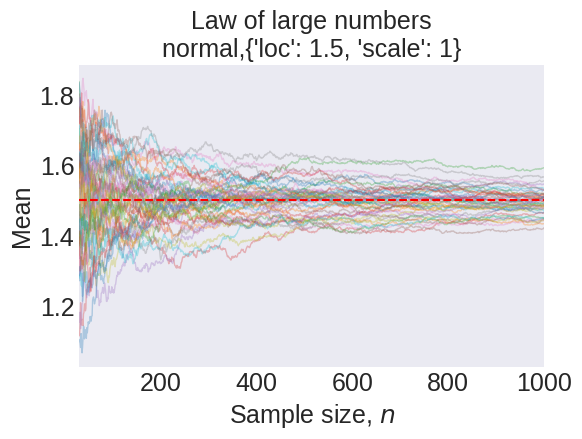

In [ ]:
#3
def plot_many(means1, title=""):
  """Use to plot many sequences of partial means"""
  ax = means1.plot(linewidth=1, alpha=0.3, figsize=(6, 4), legend=False)
  ax.set_xlabel("Sample size, $n$", fontsize=18)
  ax.set_ylabel(r"Mean", fontsize=18)
  ax.tick_params(labelsize=18)
  ax.set_title("Law of large numbers\n{}".format(title), fontsize=18)

  return ax
ax = plot_many(means1.loc[30:10000], title)
ax.axhline(y=expectation_X, linestyle='--', color='red')
#Ans.: yes, it does

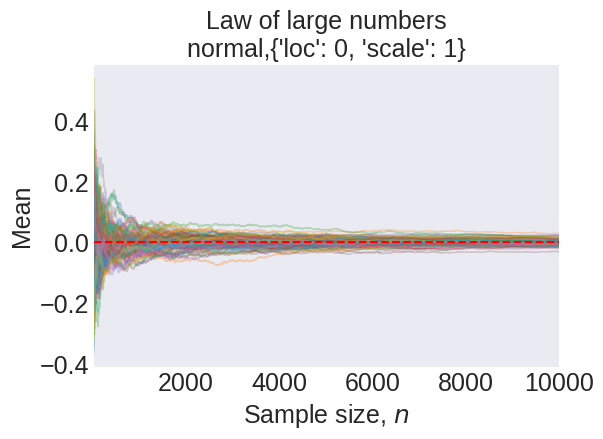

In [ ]:

#3
def plot_many2(result, title=""):
  """Use to plot many sequences of partial means"""
  ax = result.plot(linewidth=1, alpha=0.3, figsize=(6, 4), legend=False)
  ax.set_xlabel("Sample size, $n$", fontsize=18)
  ax.set_ylabel(r"Mean", fontsize=18)
  ax.tick_params(labelsize=18)
  ax.set_title("Law of large numbers\n{}".format(title), fontsize=18)

  return ax
title1 = ",".join([distribution1.func.__name__, str(distribution1.keywords)])
ax = plot_many2(result.loc[30:10000], title1)
ax.axhline(y=0, linestyle='--', color='red')
#Ans.: yes, it does

In [ ]:
#4
n_sequence2 = 5000
def simulate_huge(distribution1, sequence_length=10 ** 4):
  X_n2 = distribution1(size=(sequence_length, n_sequence2))
  # Calculate the partial sums S_n = sum of X_i from i=1 to i=n
  partial_sums1 = X_n2.cumsum(axis=0)
  # Calculate the partial sums for all n
  n_index = np.arange(start=1, stop=len(partial_sums1)+1).reshape((-1, 1))
  # Divide by {n} to get the partial averages
  partial_means1 = np.divide(partial_sums1, n_index)
  
  return partial_means1


In [ ]:
#4 (cont.)
partial_means1 = simulate_huge(distribution1)
k = 0
for i in range(0, 10000):
  for j in range(0, 5000):
    if partial_means1[i][j] < 0.0197 and partial_means1[i][j] > 0:
      k+=1
quantity = k
    
  

In [ ]:
#4 (ans.)
p_within = quantity/(10000*n_sequence2)
print("P(|S_n / n| < 0.0197) = {}".format(p_within))

P(|S_n / n| < 0.0197) = 0.3879948


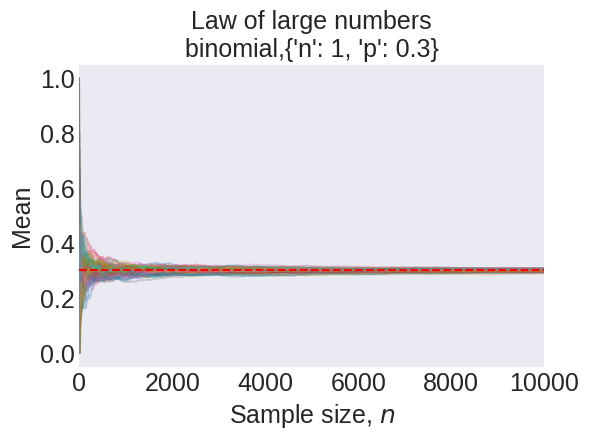

In [ ]:
#5


def function3(distribution2, sequence_length1 = 10000):
  X_n3 = distribution2(size=(sequence_length1, 100))
  partial_sums3 = X_n3.cumsum(axis=0)
  n_index = np.arange(start=1, stop=len(partial_sums3)+1).reshape((-1, 1))
  partial_means = np.divide(partial_sums3, n_index)
  
  result2 = pd.DataFrame(partial_means, index=n_index[:,0])
  return result2
distribution2 =  partial(np.random.binomial, n=1, p=0.3)
result2 = function3(distribution2)




def plot_many3(result2, title=""):
  """Use to plot many sequences of partial means"""
  ax = result2.plot(linewidth=1, alpha=0.3, figsize=(6, 4), legend=False)
  ax.set_xlabel("Sample size, $n$", fontsize=18)
  ax.set_ylabel(r"Mean", fontsize=18)
  ax.tick_params(labelsize=18)
  ax.set_title("Law of large numbers\n{}".format(title2), fontsize=18)

  return ax
title2 = ",".join([distribution2.func.__name__, str(distribution2.keywords)])
ax = plot_many3(result2.loc[0:10000], title2)
ax.axhline(y=0.3, linestyle='--', color='red')